<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 4 to 640
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                637 non-null    int64         
 1   ds                        637 non-null    datetime64[ns]
 2   open_price                637 non-null    float64       
 3   high_price                637 non-null    float64       
 4   low_price                 637 non-null    float64       
 5   y                         637 non-null    float64       
 6   volume                    637 non-null    int64         
 7   foreign                   637 non-null    int64         
 8   investment                637 non-null    int64         
 9   dealer                    637 non-null    int64         
 10  ratio_over_400_shares     637 non-null    float64       
 11  shareholders_400_to_600   637 non-null    int64         
 12  shareholders_600_to_800   6

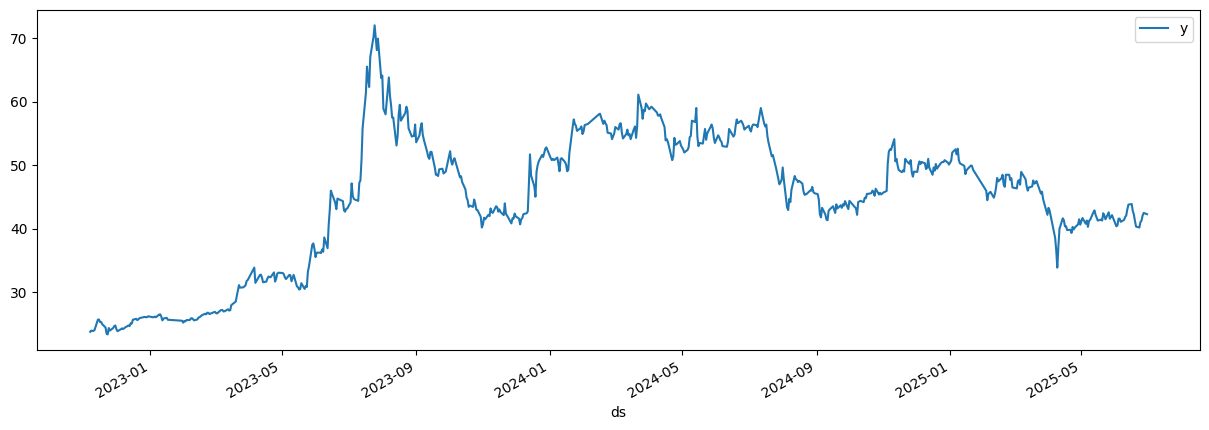

In [5]:
import pandas as pd
from sklearn.model_selection import ParameterGrid
from neuralprophet import NeuralProphet, set_log_level, set_random_seed

from src.model.features import add_stock_price_feature

# Disable logging messages unless there is an error
set_log_level("ERROR")

SYMBOL = '2356'
NAME = '英業達'

df = pd.read_csv(f'data/stocks/{SYMBOL}_stock_data_0630.csv', parse_dates=['ds'])
df = add_stock_price_feature(df)
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [7]:
# # First: fill missing dates
# df_fill = df.set_index("ds").asfreq("D").reset_index()

# # Create a mask BEFORE filling
# filled_mask = df_fill.isna().any(axis=1)

# # Then forward-fill all columns
# df_fill = df_fill.fillna(method='ffill')

# # Add a column to indicate if the row was filled
# df_fill["was_filled"] = filled_mask.astype(int)  # 1 = was filled, 0 = not

# df_fill.head(10)

In [8]:
llm_factor = pd.read_csv(f'result_{NAME}.csv', parse_dates=True, index_col=0)
llm_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2022-11-02 to 2025-06-19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   factor        412 non-null    float64
 1   explanation   412 non-null    object 
 2   updated_time  412 non-null    object 
 3   news_count    412 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 16.1+ KB


In [9]:
llm_factor = llm_factor[~llm_factor.index.duplicated(keep='first')]
llm_factor = llm_factor[['factor']]
llm_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2022-11-02 to 2025-06-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   factor  412 non-null    float64
dtypes: float64(1)
memory usage: 22.6 KB


In [10]:
df_merged = df.merge(llm_factor, how='left', left_on='ds', right_index=True)
df_merged[df_merged['factor'].isnull()]

,Unnamed: 0,ds,open_price,high_price,low_price,y,volume,foreign,investment,dealer,ratio_over_400_shares,shareholders_400_to_600,shareholders_600_to_800,shareholders_800_to_1000,ratio_over_1000_shares,high_low_diff,MA,factor
5,5,2022-11-08,23.75,24.00,23.65,24.00,4908740,373628,783000,234438,81.74,88,50,27,78.87,0.35,23.74,NaN
6,6,2022-11-09,24.00,24.20,23.90,23.95,4900087,1519550,-299000,-3228,81.74,88,50,27,78.87,0.30,23.76,NaN
10,10,2022-11-15,25.45,25.75,25.20,25.75,10995072,4373168,-127000,-457674,82.34,91,46,27,79.50,0.55,24.69,NaN
11,11,2022-11-16,25.40,25.60,25.30,25.35,9157840,1380724,-39000,-572000,82.34,91,46,27,79.50,0.30,24.97,NaN
13,13,2022-11-18,25.05,25.20,24.80,25.00,5144426,-460000,138000,-20394,82.34,91,46,27,79.50,0.40,25.43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,636,2025-06-24,41.00,41.40,40.80,41.05,10615962,3889115,-4072000,181000,68.98,91,44,28,66.20,0.60,41.01,NaN
637,637,2025-06-25,41.25,41.55,41.15,41.30,14825654,4825403,-5160000,760730,68.98,91,44,28,66.20,0.40,40.82,NaN
638,638,2025-06-26,41.60,42.20,41.50,42.10,17056650,8823092,-5424000,1116082,68.98,91,44,28,66.20,0.70,41.00,NaN
639,639,2025-06-27,42.25,42.50,42.00,42.50,9375029,2042695,-110000,-318948,68.98,91,44,28,66.20,0.50,41.43,NaN


In [11]:
df_merged['factor'] = df_merged['factor'].fillna(0)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 4 to 640
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                637 non-null    int64         
 1   ds                        637 non-null    datetime64[ns]
 2   open_price                637 non-null    float64       
 3   high_price                637 non-null    float64       
 4   low_price                 637 non-null    float64       
 5   y                         637 non-null    float64       
 6   volume                    637 non-null    int64         
 7   foreign                   637 non-null    int64         
 8   investment                637 non-null    int64         
 9   dealer                    637 non-null    int64         
 10  ratio_over_400_shares     637 non-null    float64       
 11  shareholders_400_to_600   637 non-null    int64         
 12  shareholders_600_to_800   6

In [ ]:
from src.model.utils import val_mape

param_grid = {
    'factor': [True]
    # 'volume': [0, 5, 10, 20],
    # 'high_low_diff': [0, 5, 10, 20],
    # 'MA': [0, 5, 10, 20]
}

results = []
# Iterate over each combination of hyperparameters
for params in ParameterGrid(param_grid):
    # Initialize the NeuralProphet model with current hyperparameters
    print([params])
    m = NeuralProphet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        n_lags=3,
    )
    m = m.add_country_holidays("TW")
    
    columes = ['ds', 'y', 'factor']
    m.add_future_regressor('factor')

    # lag_regs = (
    #     ('volume', params['volume']),
    #     ('high_low_diff', params['high_low_diff']),
    #     ('MA', params['MA']),
    # )
    # columes = ['ds', 'y']
    # for col, lag in lag_regs:
    #     if lag > 0:
    #         m.add_lagged_regressor(col, n_lags=lag)
    #         columes.append(col)
    
    df_train, df_val = m.split_df(df_merged[columes], valid_p=0.2)
    set_random_seed(0)
    metrics = m.fit(df_train, validation_df=df_val, freq="D")
    
    # Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
    # df_future = m.make_future_dataframe(df_merged[columes], n_historic_predictions=True, periods=7)

    # Predict the future
    forecast = m.predict(df_merged[columes])
    
    rmse = metrics.iloc[-1]['RMSE_val']
    mape = val_mape(df_val[:-1], forecast)
    results.append({**params, 'RMSE': rmse, 'MAPE': mape})

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

[{'factor': True}]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 223/223 [00:00<00:00, 287.38it/s]


Training: |          | 0/? [00:11<?, ?it/s, v_num=2995, MAE_val=25.10, RMSE_val=32.00, Loss_val=0.579, RegLoss_val=0.000, train_loss=81.50, reg_loss=0.000, MAE=3.39e+3, RMSE=1.81e+4, Loss=78.50, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\data\split.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty o

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


In [15]:
results_df = pd.DataFrame(results)
results_df.to_csv(f'add_future_{SYMBOL}.csv')
results_df

,factor,RMSE,MAPE
0,True,32.029285,0.686501
